#### Vorbereitungen

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [4]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


# Initiales Netz mit 1 Hidden Layer

activation = relu

loss = categorial_crossentropy

optimizer = adam

Epoch 1/60
680/680 [==============================] - 14s 13ms/step - loss: 1.9420 - accuracy: 0.5616 - val_loss: 1.2190 - val_accuracy: 0.6926
Epoch 2/60
680/680 [==============================] - 5s 7ms/step - loss: 0.9576 - accuracy: 0.8131 - val_loss: 0.8931 - val_accuracy: 0.7833
Epoch 3/60
680/680 [==============================] - 6s 8ms/step - loss: 0.7546 - accuracy: 0.8557 - val_loss: 0.7977 - val_accuracy: 0.8029
Epoch 4/60
680/680 [==============================] - 6s 10ms/step - loss: 0.6581 - accuracy: 0.8760 - val_loss: 0.7931 - val_accuracy: 0.8086
Epoch 5/60
680/680 [==============================] - 7s 10ms/step - loss: 0.5972 - accuracy: 0.8874 - val_loss: 0.7104 - val_accuracy: 0.8337
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5533 - accuracy: 0.8958 - val_loss: 0.7404 - val_accuracy: 0.8244
Epoch 7/60
680/680 [==============================] - 7s 11ms/step - loss: 0.5172 - accuracy: 0.9019 - val_loss: 0.6980 - val_accuracy: 0.8403
E

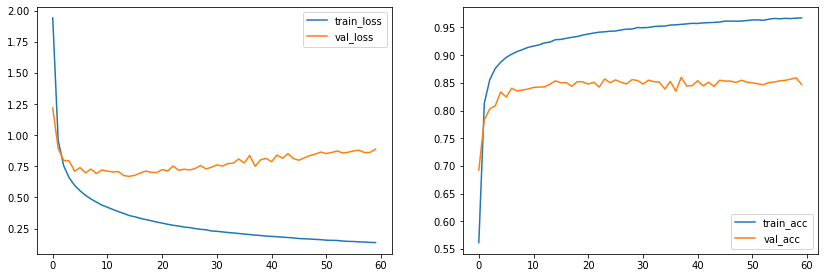

In [5]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Erste Anpassungen und Einführung Early Stopping

Neuronen = 344

Epochs = 150

Epoch 1/100
680/680 [==============================] - 12s 14ms/step - loss: 1.4007 - accuracy: 0.6953 - val_loss: 0.8767 - val_accuracy: 0.7867
Epoch 2/100
680/680 [==============================] - 9s 13ms/step - loss: 0.6581 - accuracy: 0.8734 - val_loss: 0.7347 - val_accuracy: 0.8192
Epoch 3/100
680/680 [==============================] - 9s 13ms/step - loss: 0.5050 - accuracy: 0.9015 - val_loss: 0.6448 - val_accuracy: 0.8511
Epoch 4/100
680/680 [==============================] - 10s 15ms/step - loss: 0.4112 - accuracy: 0.9182 - val_loss: 0.7023 - val_accuracy: 0.8363
Epoch 5/100
680/680 [==============================] - 9s 13ms/step - loss: 0.3432 - accuracy: 0.9293 - val_loss: 0.6387 - val_accuracy: 0.8466
Epoch 6/100
680/680 [==============================] - 9s 13ms/step - loss: 0.2885 - accuracy: 0.9397 - val_loss: 0.6731 - val_accuracy: 0.8382
Epoch 7/100
680/680 [==============================] - 9s 13ms/step - loss: 0.2466 - accuracy: 0.9478 - val_loss: 0.6501 - val_accurac

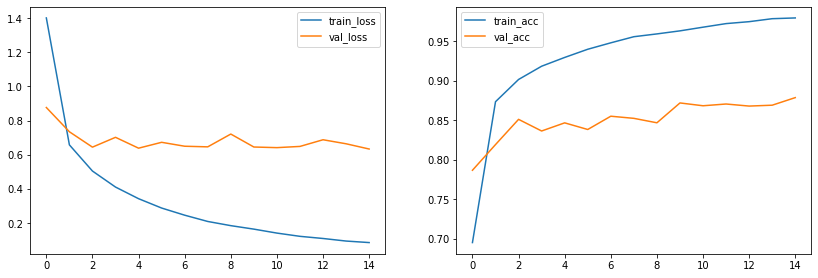

In [6]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/200
680/680 [==============================] - 5s 6ms/step - loss: 2.3008 - accuracy: 0.4644 - val_loss: 1.4522 - val_accuracy: 0.6306
Epoch 2/200
680/680 [==============================] - 3s 5ms/step - loss: 1.2205 - accuracy: 0.7419 - val_loss: 1.0658 - val_accuracy: 0.7327
Epoch 3/200
680/680 [==============================] - 3s 5ms/step - loss: 0.9698 - accuracy: 0.8058 - val_loss: 0.9420 - val_accuracy: 0.7659
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 0.8575 - accuracy: 0.8339 - val_loss: 0.8633 - val_accuracy: 0.7840
Epoch 5/200
680/680 [==============================] - 3s 5ms/step - loss: 0.7921 - accuracy: 0.8483 - val_loss: 0.8136 - val_accuracy: 0.8031
Epoch 6/200
680/680 [==============================] - 4s 5ms/step - loss: 0.7482 - accuracy: 0.8584 - val_loss: 0.8078 - val_accuracy: 0.8030
Epoch 7/200
680/680 [==============================] - 4s 5ms/step - loss: 0.7147 - accuracy: 0.8654 - val_loss: 0.7926 - val_accuracy: 0.8074

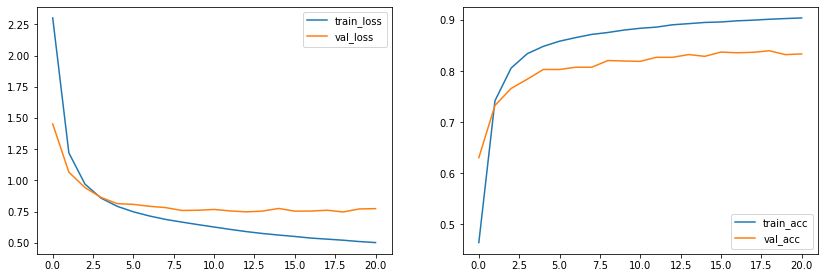

In [9]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(60, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/200
680/680 [==============================] - 5s 6ms/step - loss: 1.6990 - accuracy: 0.6249 - val_loss: 1.0120 - val_accuracy: 0.7488
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 0.8140 - accuracy: 0.8444 - val_loss: 0.7826 - val_accuracy: 0.8190
Epoch 3/200
680/680 [==============================] - 4s 6ms/step - loss: 0.6529 - accuracy: 0.8792 - val_loss: 0.7199 - val_accuracy: 0.8296
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 0.5674 - accuracy: 0.8942 - val_loss: 0.6991 - val_accuracy: 0.8397
Epoch 5/200
680/680 [==============================] - 4s 6ms/step - loss: 0.5082 - accuracy: 0.9026 - val_loss: 0.6858 - val_accuracy: 0.8447
Epoch 6/200
680/680 [==============================] - 4s 6ms/step - loss: 0.4582 - accuracy: 0.9119 - val_loss: 0.6844 - val_accuracy: 0.8485
Epoch 7/200
680/680 [==============================] - 4s 6ms/step - loss: 0.4159 - accuracy: 0.9196 - val_loss: 0.6836 - val_accuracy: 0.8492

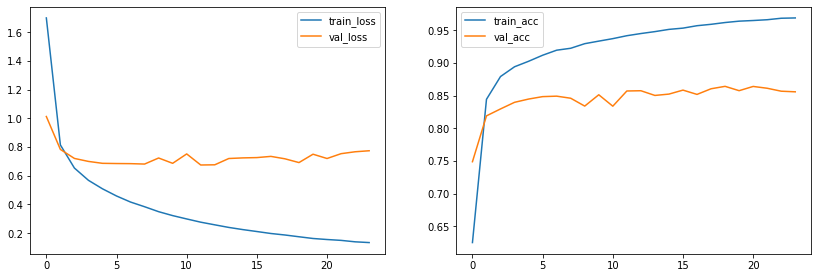

In [10]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(150, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/200
680/680 [==============================] - 6s 8ms/step - loss: 1.3465 - accuracy: 0.7057 - val_loss: 0.8379 - val_accuracy: 0.7982
Epoch 2/200
680/680 [==============================] - 5s 8ms/step - loss: 0.6391 - accuracy: 0.8754 - val_loss: 0.7696 - val_accuracy: 0.8132
Epoch 3/200
680/680 [==============================] - 5s 7ms/step - loss: 0.4926 - accuracy: 0.9023 - val_loss: 0.6942 - val_accuracy: 0.8390
Epoch 4/200
680/680 [==============================] - 5s 7ms/step - loss: 0.3924 - accuracy: 0.9207 - val_loss: 0.6856 - val_accuracy: 0.8401
Epoch 5/200
680/680 [==============================] - 5s 8ms/step - loss: 0.3219 - accuracy: 0.9328 - val_loss: 0.6716 - val_accuracy: 0.8500
Epoch 6/200
680/680 [==============================] - 5s 8ms/step - loss: 0.2648 - accuracy: 0.9446 - val_loss: 0.6905 - val_accuracy: 0.8470
Epoch 7/200
680/680 [==============================] - 5s 8ms/step - loss: 0.2253 - accuracy: 0.9511 - val_loss: 0.7862 - val_accuracy: 0.8304

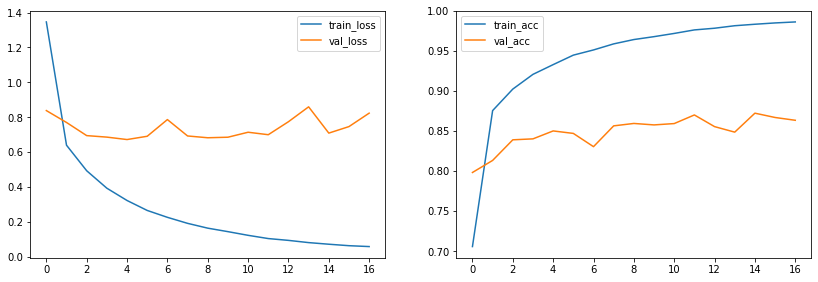

In [12]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(430, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# I. Dropout vs no Dropout

Einführung von Dropout, um Training zu verbessern

Dropout = 0.5

Epoch 1/150
680/680 [==============================] - 5s 6ms/step - loss: 2.7218 - accuracy: 0.2707 - val_loss: 1.5963 - val_accuracy: 0.6506
Epoch 2/150
680/680 [==============================] - 4s 6ms/step - loss: 1.8274 - accuracy: 0.4974 - val_loss: 1.1787 - val_accuracy: 0.7695
Epoch 3/150
680/680 [==============================] - 4s 6ms/step - loss: 1.5695 - accuracy: 0.5671 - val_loss: 0.9444 - val_accuracy: 0.8012
Epoch 4/150
680/680 [==============================] - 4s 6ms/step - loss: 1.4386 - accuracy: 0.6011 - val_loss: 0.8715 - val_accuracy: 0.8067
Epoch 5/150
680/680 [==============================] - 4s 6ms/step - loss: 1.3622 - accuracy: 0.6188 - val_loss: 0.8103 - val_accuracy: 0.8203
Epoch 6/150
680/680 [==============================] - 4s 6ms/step - loss: 1.3145 - accuracy: 0.6276 - val_loss: 0.7739 - val_accuracy: 0.8370
Epoch 7/150
680/680 [==============================] - 4s 6ms/step - loss: 1.2701 - accuracy: 0.6356 - val_loss: 0.7447 - val_accuracy: 0.8325

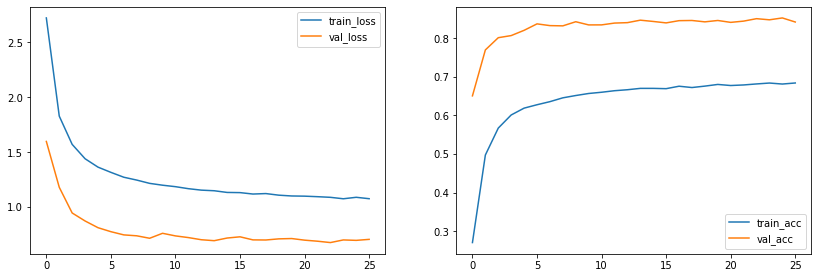

In [17]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=150, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

ohne early stopping

Epoch 1/120
680/680 [==============================] - 5s 6ms/step - loss: 2.5941 - accuracy: 0.3115 - val_loss: 1.4685 - val_accuracy: 0.6580
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 1.6813 - accuracy: 0.5479 - val_loss: 1.0691 - val_accuracy: 0.7606
Epoch 3/120
680/680 [==============================] - 4s 6ms/step - loss: 1.4241 - accuracy: 0.6172 - val_loss: 0.8835 - val_accuracy: 0.7879
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 1.2965 - accuracy: 0.6493 - val_loss: 0.8272 - val_accuracy: 0.8152
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 1.2136 - accuracy: 0.6692 - val_loss: 0.7811 - val_accuracy: 0.8214
Epoch 6/120
680/680 [==============================] - 4s 6ms/step - loss: 1.1622 - accuracy: 0.6816 - val_loss: 0.7414 - val_accuracy: 0.8242
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 1.1112 - accuracy: 0.6951 - val_loss: 0.7024 - val_accuracy: 0.8410

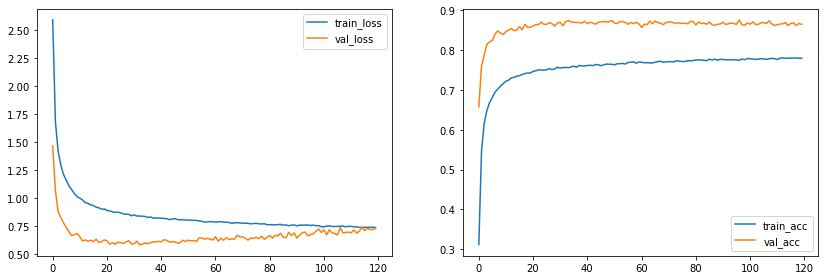

In [18]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          # callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung Droprate

Droprate nochmals anpassen -> Droprate auf 0.3

Epochs = 135

Epoch 1/130
680/680 [==============================] - 7s 8ms/step - loss: 2.1259 - accuracy: 0.4624 - val_loss: 1.1385 - val_accuracy: 0.7399
Epoch 2/130
680/680 [==============================] - 4s 6ms/step - loss: 1.1466 - accuracy: 0.7278 - val_loss: 0.8090 - val_accuracy: 0.8037
Epoch 3/130
680/680 [==============================] - 4s 5ms/step - loss: 0.9158 - accuracy: 0.7826 - val_loss: 0.6948 - val_accuracy: 0.8350
Epoch 4/130
680/680 [==============================] - 4s 5ms/step - loss: 0.8016 - accuracy: 0.8076 - val_loss: 0.6447 - val_accuracy: 0.8495
Epoch 5/130
680/680 [==============================] - 4s 5ms/step - loss: 0.7244 - accuracy: 0.8230 - val_loss: 0.6348 - val_accuracy: 0.8470
Epoch 6/130
680/680 [==============================] - 4s 6ms/step - loss: 0.6754 - accuracy: 0.8333 - val_loss: 0.6101 - val_accuracy: 0.8593
Epoch 7/130
680/680 [==============================] - 4s 6ms/step - loss: 0.6347 - accuracy: 0.8419 - val_loss: 0.5856 - val_accuracy: 0.8651

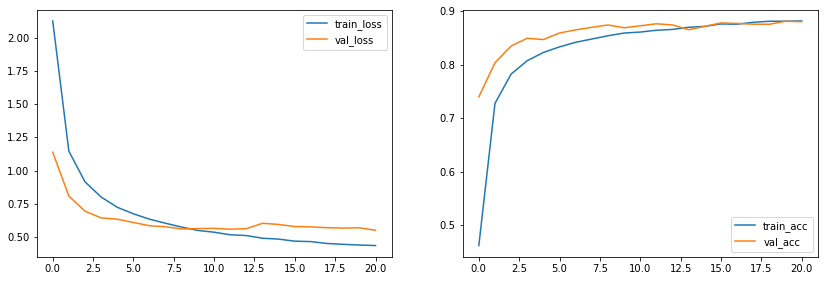

In [19]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=130, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray),
          callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Dropoutanpassung 

Dropout 0,4 aber mit Neuronen = 135

Epoch 1/200
680/680 [==============================] - 5s 6ms/step - loss: 2.5045 - accuracy: 0.3427 - val_loss: 1.4338 - val_accuracy: 0.6820
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 1.5796 - accuracy: 0.5894 - val_loss: 1.0457 - val_accuracy: 0.7553
Epoch 3/200
680/680 [==============================] - 4s 6ms/step - loss: 1.3133 - accuracy: 0.6583 - val_loss: 0.8521 - val_accuracy: 0.8015
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 1.1726 - accuracy: 0.6947 - val_loss: 0.7803 - val_accuracy: 0.8212
Epoch 5/200
680/680 [==============================] - 3s 5ms/step - loss: 1.0893 - accuracy: 0.7130 - val_loss: 0.7244 - val_accuracy: 0.8323
Epoch 6/200
680/680 [==============================] - 3s 5ms/step - loss: 1.0340 - accuracy: 0.7267 - val_loss: 0.7206 - val_accuracy: 0.8294
Epoch 7/200
680/680 [==============================] - 3s 5ms/step - loss: 0.9977 - accuracy: 0.7354 - val_loss: 0.6850 - val_accuracy: 0.8462

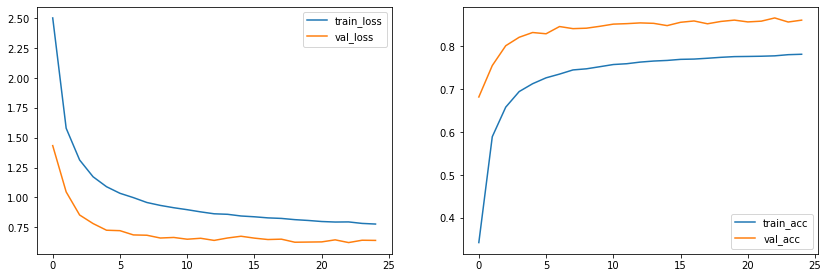

In [48]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_40 = Sequential()
three_layer_mlp_dropout_40.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_40.add(Dropout(0.4))
three_layer_mlp_dropout_40.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_40.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_40_history = three_layer_mlp_dropout_40.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_40_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_40_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_40_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_40_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Dropoutanpassung 

Dropout 0,45 

Epoch 1/150
680/680 [==============================] - 16s 20ms/step - loss: 2.6514 - accuracy: 0.2893 - val_loss: 1.6012 - val_accuracy: 0.6592
Epoch 2/150
680/680 [==============================] - 13s 19ms/step - loss: 1.7658 - accuracy: 0.5148 - val_loss: 1.1219 - val_accuracy: 0.7536
Epoch 3/150
680/680 [==============================] - 14s 21ms/step - loss: 1.4899 - accuracy: 0.5902 - val_loss: 0.9352 - val_accuracy: 0.7822
Epoch 4/150
680/680 [==============================] - 17s 25ms/step - loss: 1.3595 - accuracy: 0.6227 - val_loss: 0.8551 - val_accuracy: 0.8055
Epoch 5/150
680/680 [==============================] - 9s 13ms/step - loss: 1.2765 - accuracy: 0.6448 - val_loss: 0.8289 - val_accuracy: 0.8085
Epoch 6/150
680/680 [==============================] - 8s 11ms/step - loss: 1.2181 - accuracy: 0.6584 - val_loss: 0.7850 - val_accuracy: 0.8245
Epoch 7/150
680/680 [==============================] - 11s 15ms/step - loss: 1.1740 - accuracy: 0.6700 - val_loss: 0.7684 - val_accu

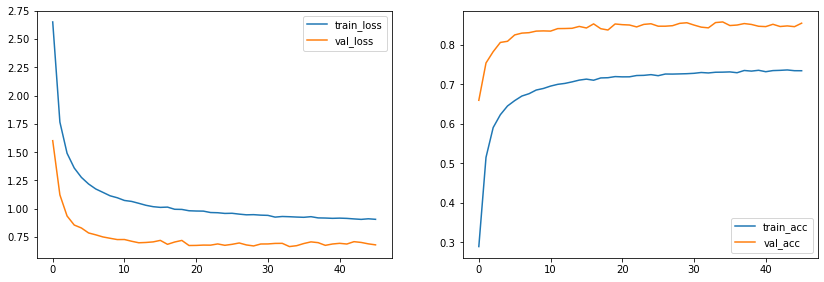

In [70]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_45 = Sequential()
three_layer_mlp_dropout_45.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_45.add(Dropout(0.45))
three_layer_mlp_dropout_45.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_45.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.002, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_45_history = three_layer_mlp_dropout_45.fit(x_train_gray, y_train_gray, 
          epochs=150, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_45_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_45_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_45_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_45_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Dropout Test Epochs

Epoch 1/200
680/680 [==============================] - 6s 6ms/step - loss: 2.2101 - accuracy: 0.4445 - val_loss: 1.2279 - val_accuracy: 0.7144
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 1.1947 - accuracy: 0.7188 - val_loss: 0.8694 - val_accuracy: 0.7960
Epoch 3/200
680/680 [==============================] - 4s 6ms/step - loss: 0.9427 - accuracy: 0.7812 - val_loss: 0.7479 - val_accuracy: 0.8207
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 0.8131 - accuracy: 0.8100 - val_loss: 0.6721 - val_accuracy: 0.8420
Epoch 5/200
680/680 [==============================] - 4s 6ms/step - loss: 0.7377 - accuracy: 0.8236 - val_loss: 0.6622 - val_accuracy: 0.8430
Epoch 6/200
680/680 [==============================] - 4s 5ms/step - loss: 0.6796 - accuracy: 0.8359 - val_loss: 0.6284 - val_accuracy: 0.8520
Epoch 7/200
680/680 [==============================] - 4s 6ms/step - loss: 0.6377 - accuracy: 0.8428 - val_loss: 0.6139 - val_accuracy: 0.8561

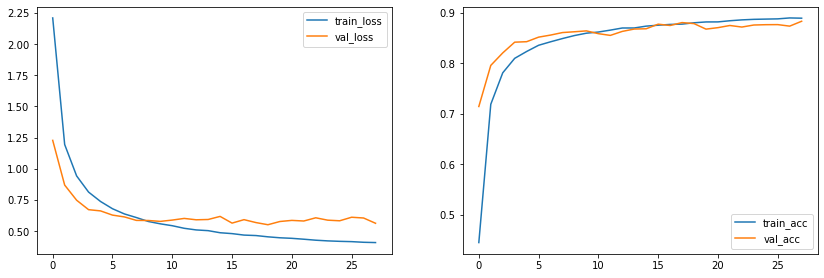

In [56]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_20 = Sequential()
three_layer_mlp_dropout_20.add(Dense(100, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_20.add(Dropout(0.2))
three_layer_mlp_dropout_20.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_20.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_20_history = three_layer_mlp_dropout_20.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_20_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_20_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_20_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_20_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich von versch. Aktivierungsfunktionen

Aktivierungsfunktion - sigmoid

Änderung der Aktivierungsfunktion mit aktuell besten NeuroNetz (Dense=150, Dropout=0.4)

Epoch 1/200
680/680 [==============================] - 6s 7ms/step - loss: 2.4771 - accuracy: 0.3769 - val_loss: 1.4691 - val_accuracy: 0.6759
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 1.2989 - accuracy: 0.6842 - val_loss: 0.9500 - val_accuracy: 0.7763
Epoch 3/200
680/680 [==============================] - 4s 5ms/step - loss: 0.9609 - accuracy: 0.7715 - val_loss: 0.7592 - val_accuracy: 0.8162
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 0.8050 - accuracy: 0.8067 - val_loss: 0.6935 - val_accuracy: 0.8379
Epoch 5/200
680/680 [==============================] - 5s 7ms/step - loss: 0.7033 - accuracy: 0.8304 - val_loss: 0.6339 - val_accuracy: 0.8413
Epoch 6/200
680/680 [==============================] - 4s 7ms/step - loss: 0.6390 - accuracy: 0.8448 - val_loss: 0.5929 - val_accuracy: 0.8564
Epoch 7/200
680/680 [==============================] - 4s 7ms/step - loss: 0.5882 - accuracy: 0.8566 - val_loss: 0.5566 - val_accuracy: 0.8644

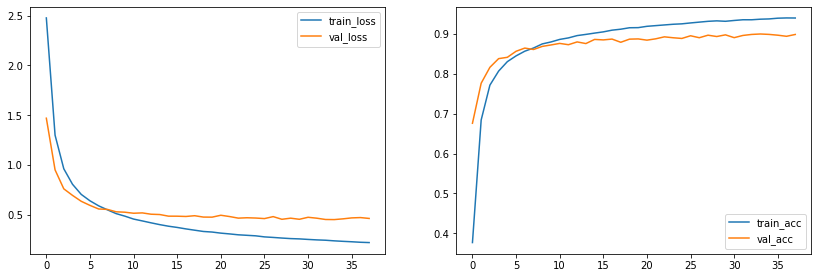

In [57]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_40_sigmoid = Sequential()
three_layer_mlp_dropout_40_sigmoid.add(Dense(135, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_40_sigmoid.add(Dropout(0.4))
three_layer_mlp_dropout_40_sigmoid.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_40_sigmoid.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_40_sigmoid_history = three_layer_mlp_dropout_40_sigmoid.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss sinkt mit weniger neuronen in der inputschicht -> reduzieren auf 90 und 60 Neuronen

Epoch 1/200
680/680 [==============================] - 6s 7ms/step - loss: 2.6367 - accuracy: 0.3369 - val_loss: 1.6504 - val_accuracy: 0.6550
Epoch 2/200
680/680 [==============================] - 5s 7ms/step - loss: 1.4883 - accuracy: 0.6358 - val_loss: 1.0714 - val_accuracy: 0.7560
Epoch 3/200
680/680 [==============================] - 4s 6ms/step - loss: 1.1233 - accuracy: 0.7277 - val_loss: 0.8479 - val_accuracy: 0.8058
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 0.9432 - accuracy: 0.7701 - val_loss: 0.7456 - val_accuracy: 0.8237
Epoch 5/200
680/680 [==============================] - 5s 8ms/step - loss: 0.8329 - accuracy: 0.7967 - val_loss: 0.6725 - val_accuracy: 0.8362
Epoch 6/200
680/680 [==============================] - 5s 8ms/step - loss: 0.7597 - accuracy: 0.8127 - val_loss: 0.6324 - val_accuracy: 0.8500
Epoch 7/200
680/680 [==============================] - 6s 9ms/step - loss: 0.7014 - accuracy: 0.8261 - val_loss: 0.5968 - val_accuracy: 0.8599

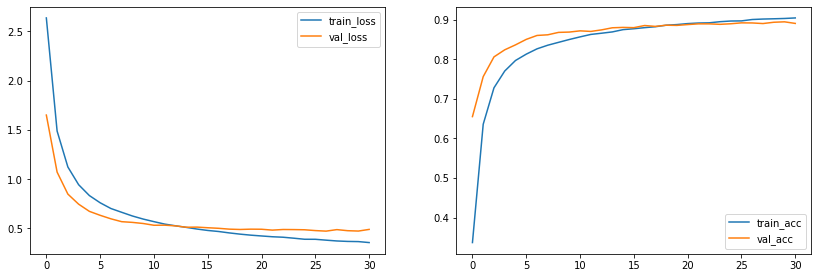

In [63]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_40_sigmoid = Sequential()
three_layer_mlp_dropout_40_sigmoid.add(Dense(90, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_40_sigmoid.add(Dropout(0.4))
three_layer_mlp_dropout_40_sigmoid.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_40_sigmoid.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_40_sigmoid_history = three_layer_mlp_dropout_40_sigmoid.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

60 Neuronen

Epoch 1/200
680/680 [==============================] - 5s 6ms/step - loss: 2.8523 - accuracy: 0.2797 - val_loss: 1.8850 - val_accuracy: 0.6097
Epoch 2/200
680/680 [==============================] - 3s 5ms/step - loss: 1.7341 - accuracy: 0.5657 - val_loss: 1.2544 - val_accuracy: 0.7371
Epoch 3/200
680/680 [==============================] - 3s 5ms/step - loss: 1.3423 - accuracy: 0.6668 - val_loss: 0.9912 - val_accuracy: 0.7842
Epoch 4/200
680/680 [==============================] - 4s 5ms/step - loss: 1.1468 - accuracy: 0.7160 - val_loss: 0.8415 - val_accuracy: 0.8046
Epoch 5/200
680/680 [==============================] - 3s 5ms/step - loss: 1.0230 - accuracy: 0.7434 - val_loss: 0.7593 - val_accuracy: 0.8210
Epoch 6/200
680/680 [==============================] - 3s 5ms/step - loss: 0.9382 - accuracy: 0.7664 - val_loss: 0.6988 - val_accuracy: 0.8378
Epoch 7/200
680/680 [==============================] - 3s 5ms/step - loss: 0.8781 - accuracy: 0.7792 - val_loss: 0.6718 - val_accuracy: 0.8355

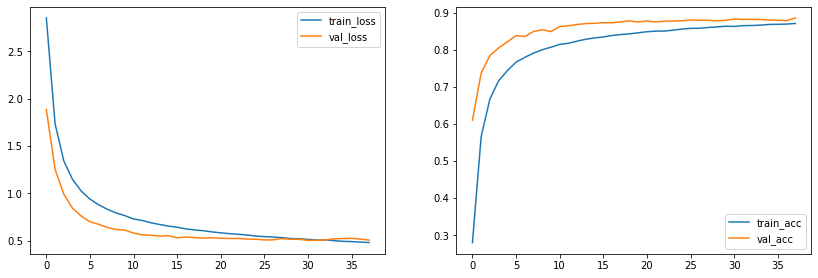

In [65]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_40_sigmoid = Sequential()
three_layer_mlp_dropout_40_sigmoid.add(Dense(60, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_40_sigmoid.add(Dropout(0.4))
three_layer_mlp_dropout_40_sigmoid.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_40_sigmoid.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_40_sigmoid_history = three_layer_mlp_dropout_40_sigmoid.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_40_sigmoid_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich von versch. Optimizern

initial = adam

adagrad

adadelta

rmsprop

### Adagrad

Epoch 1/200
680/680 [==============================] - 5s 6ms/step - loss: 3.8935 - accuracy: 0.0240 - val_loss: 3.7460 - val_accuracy: 0.0320
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7940 - accuracy: 0.0285 - val_loss: 3.7293 - val_accuracy: 0.0454
Epoch 3/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7679 - accuracy: 0.0306 - val_loss: 3.7239 - val_accuracy: 0.0556
Epoch 4/200
680/680 [==============================] - 3s 5ms/step - loss: 3.7501 - accuracy: 0.0352 - val_loss: 3.7190 - val_accuracy: 0.0648
Epoch 5/200
680/680 [==============================] - 3s 5ms/step - loss: 3.7375 - accuracy: 0.0389 - val_loss: 3.7146 - val_accuracy: 0.0721
Epoch 6/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7260 - accuracy: 0.0418 - val_loss: 3.7094 - val_accuracy: 0.0759
Epoch 7/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7145 - accuracy: 0.0465 - val_loss: 3.7026 - val_accuracy: 0.0814

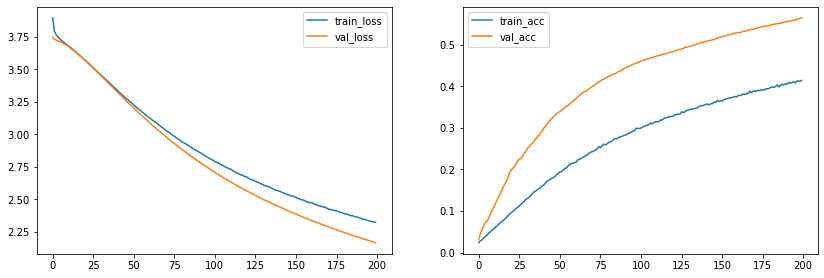

In [66]:
# Definition Topologie des Netzes
three_layer_mlp_do_40_sig_adagrad = Sequential()
three_layer_mlp_do_40_sig_adagrad.add(Dense(60, activation ='sigmoid', input_dim=1024))
three_layer_mlp_do_40_sig_adagrad.add(Dropout(0.4))
three_layer_mlp_do_40_sig_adagrad.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_do_40_sig_adagrad.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_do_40_sig_adagrad_history = three_layer_mlp_do_40_sig_adagrad.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_do_40_sig_adagrad_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_do_40_sig_adagrad_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_do_40_sig_adagrad_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_do_40_sig_adagrad_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Adadelta

Epoch 1/200
680/680 [==============================] - 5s 5ms/step - loss: 3.8573 - accuracy: 0.0265 - val_loss: 3.7330 - val_accuracy: 0.0234
Epoch 2/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7900 - accuracy: 0.0289 - val_loss: 3.7247 - val_accuracy: 0.0403
Epoch 3/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7606 - accuracy: 0.0335 - val_loss: 3.7181 - val_accuracy: 0.0559
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7464 - accuracy: 0.0367 - val_loss: 3.7131 - val_accuracy: 0.0655
Epoch 5/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7333 - accuracy: 0.0405 - val_loss: 3.7078 - val_accuracy: 0.0741
Epoch 6/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7204 - accuracy: 0.0438 - val_loss: 3.7017 - val_accuracy: 0.0829
Epoch 7/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7121 - accuracy: 0.0467 - val_loss: 3.6953 - val_accuracy: 0.0876

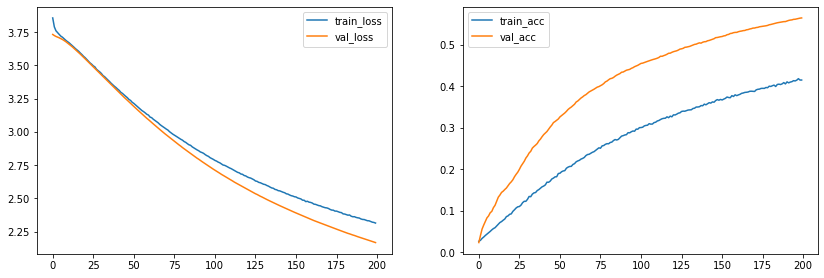

In [67]:
# Definition Topologie des Netzes
three_layer_mlp_do_40_sig_adadelta = Sequential()
three_layer_mlp_do_40_sig_adadelta.add(Dense(60, activation ='sigmoid', input_dim=1024))
three_layer_mlp_do_40_sig_adadelta.add(Dropout(0.4))
three_layer_mlp_do_40_sig_adadelta.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_do_40_sig_adadelta.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_do_40_sig_adadelta_history = three_layer_mlp_do_40_sig_adadelta.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_do_40_sig_adadelta_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_do_40_sig_adadelta_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_do_40_sig_adadelta_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_do_40_sig_adadelta_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### RSMPROP

Epoch 1/200
680/680 [==============================] - 7s 6ms/step - loss: 3.8770 - accuracy: 0.0240 - val_loss: 3.7552 - val_accuracy: 0.0395
Epoch 2/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7987 - accuracy: 0.0273 - val_loss: 3.7406 - val_accuracy: 0.0513
Epoch 3/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7674 - accuracy: 0.0323 - val_loss: 3.7317 - val_accuracy: 0.0644
Epoch 4/200
680/680 [==============================] - 4s 5ms/step - loss: 3.7522 - accuracy: 0.0359 - val_loss: 3.7249 - val_accuracy: 0.0742
Epoch 5/200
680/680 [==============================] - 3s 5ms/step - loss: 3.7391 - accuracy: 0.0404 - val_loss: 3.7187 - val_accuracy: 0.0813
Epoch 6/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7272 - accuracy: 0.0435 - val_loss: 3.7122 - val_accuracy: 0.0899
Epoch 7/200
680/680 [==============================] - 3s 5ms/step - loss: 3.7182 - accuracy: 0.0471 - val_loss: 3.7045 - val_accuracy: 0.0987

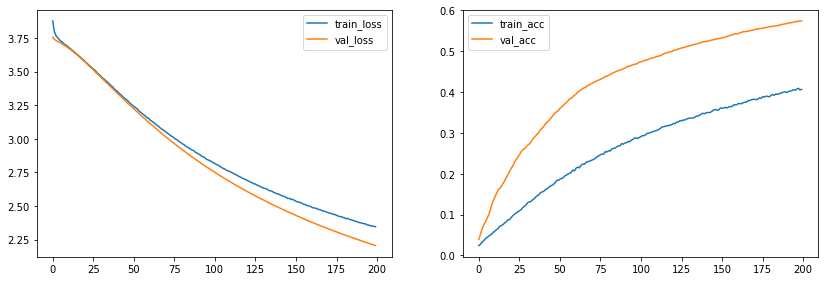

In [68]:
# Definition Topologie des Netzes
three_layer_mlp_do_40_sig_rsmprop = Sequential()
three_layer_mlp_do_40_sig_rsmprop.add(Dense(60, activation ='sigmoid', input_dim=1024))
three_layer_mlp_do_40_sig_rsmprop.add(Dropout(0.4))
three_layer_mlp_do_40_sig_rsmprop.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_do_40_sig_rsmprop.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_do_40_sig_rsmprop_history = three_layer_mlp_do_40_sig_rsmprop.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_do_40_sig_rsmprop_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_do_40_sig_rsmprop_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_do_40_sig_rsmprop_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_do_40_sig_rsmprop_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])